In [2]:
from scipy import signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn
%matplotlib inline

### 1. Simulate pink noise (=1/f)

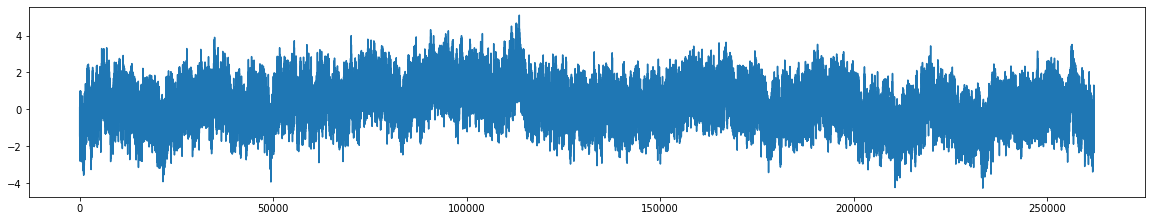

In [37]:
beta = 1 # the exponent
samples = 2**18 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)

f, ax = plt.subplots(1, figsize=(20, 3.5))
ax.plot(y)


### 2. Plot power spectrum

[None, None]

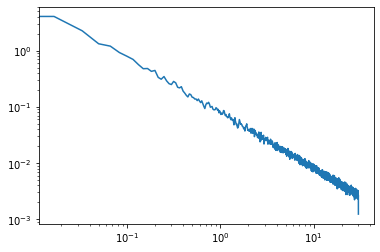

In [38]:
freq = 60
segment = 60
overlap = segment/2

f, p = signal.welch(y, fs=freq, nperseg=segment*freq, noverlap=overlap*freq, detrend='constant')

fig, ax = plt.subplots()
ax.plot(f, p)
ax.set(xscale='log', yscale='log')

### 3. Simulate signal with pink noise + sinus signal (e.g. hippus)

[None, None]

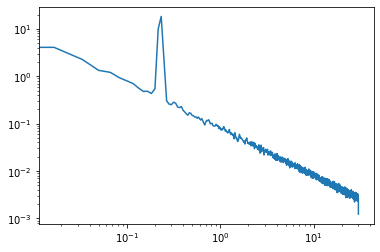

In [39]:
cycles = 1000 # how many sine cycles
resolution = 262144 # how many datapoints to generate
length = np.pi * 2 * cycles
my_wave = np.sin(np.arange(0, length, length / resolution))

combined_signal = my_wave + y

f, p = signal.welch(combined_signal, fs=freq, nperseg=segment*freq, noverlap=overlap*freq, detrend='constant')

fig, ax = plt.subplots()
ax.plot(f, p)
ax.set(xscale='log', yscale='log')

### 4. Scale the noise

In [49]:
scaling = 1.5

signal 1 has STD of 1.023596565808902
signal 2 has STD of 2.6511239567783482


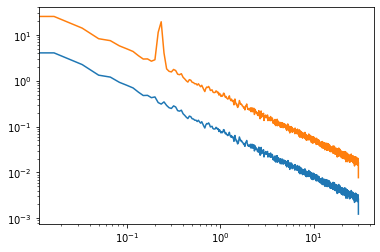

In [50]:
fig, ax = plt.subplots()
combined_signal1 = y
combined_signal2 = my_wave + y* scaling
f, p = signal.welch(combined_signal1, fs=freq, nperseg=segment*freq, noverlap=overlap*freq, detrend='constant')
ax.plot(f, p)
f, p = signal.welch(combined_signal2, fs=freq, nperseg=segment*freq, noverlap=overlap*freq, detrend='constant')
ax.plot(f, p)
ax.set(xscale='log', yscale='log')

print('signal 1 has STD of', np.std(combined_signal1))
print('signal 2 has STD of', np.std(combined_signal2))

### 5. Z-score before

signal 1 has STD of 1.0
signal 2 has STD of 0.9999999999999999


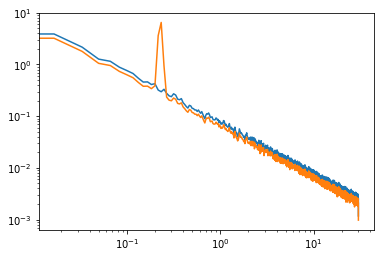

In [48]:
fig, ax = plt.subplots()
combined_signal1 = y
combined_signal1 = (combined_signal1 - np.mean(combined_signal1)) / np.std(combined_signal1)

combined_signal2 = my_wave + y*1.5
combined_signal2 = (combined_signal2 - np.mean(combined_signal2)) / np.std(combined_signal2)

f, p = signal.welch(combined_signal1, fs=freq, nperseg=segment*freq, noverlap=overlap*freq, detrend='constant')
ax.plot(f, p)
f, p = signal.welch(combined_signal2, fs=freq, nperseg=segment*freq, noverlap=overlap*freq, detrend='constant')
ax.plot(f, p)
ax.set(xscale='log', yscale='log')

print('signal 1 has STD of', np.std(combined_signal1))
print('signal 2 has STD of', np.std(combined_signal2))

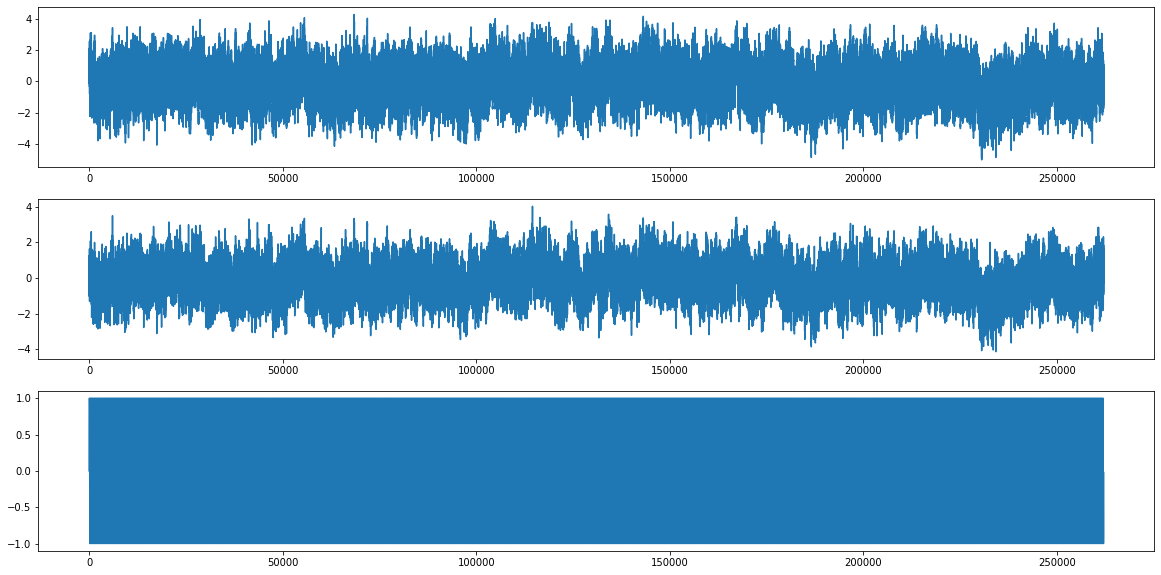

In [27]:
f, ax = plt.subplots(3, figsize=(20, 10))
ax[0].plot(my_wave+ y)
ax[1].plot(y)
ax[2].plot(my_wave)